### Part A

In [37]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, recall_score
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# loading the data
df1 = pd.read_csv("CE802_P3_Data.csv")
df1.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F26,F27,F28,F29,F30,F31,F32,F33,F34,Target
0,UK,370.26,21.93,-136.72,119.82,-13.37,-44.61,763.7,-76.20,6,...,147.19,-51.55,2257.12,21.67,-1931.44,-844.86,30.06,3787.60,-26014.95,530.15
1,UK,-953.00,13.50,-171.22,271.02,-1.94,-43.77,106.9,-62.84,9,...,178.92,-112.01,2925.90,23.41,-1205.58,608.34,26.36,4561.62,-27421.80,273.97
2,USA,-583.15,8.58,-270.10,301.16,3.57,-28.95,194.3,-71.44,3,...,169.67,-90.00,3787.28,18.10,-2115.10,428.31,28.12,3736.36,-36363.96,488.70
3,Rest,-1139.31,9.51,-172.92,249.80,5.20,-32.82,1406.0,-72.84,18,...,181.65,-77.60,4333.00,23.91,-2169.74,-43.80,30.34,5004.70,-32023.29,-7.04
4,UK,-957.81,1.74,-67.48,269.64,-0.70,-38.04,-180.8,-57.58,12,...,197.30,-134.04,3295.30,19.89,-1318.90,-2285.46,25.06,5850.30,-49911.18,401.79


In [39]:
# Statistical summary of a data frame
df1.describe()

,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,...,F26,F27,F28,F29,F30,F31,F32,F33,F34,Target
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,...,1400.000000,1400.000000,1400.00000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,-641.343829,11.865429,-154.658100,259.075329,-1.052943,-35.517536,679.723657,-68.659814,12.019286,-6289.456579,...,174.414379,-85.566979,3186.37190,21.152036,-1928.583871,-335.527993,26.009264,5023.207543,-31401.601586,181.948593
std,413.678375,8.564316,61.000069,89.431742,4.115171,9.185636,583.314937,8.608240,5.479344,2966.325436,...,44.036834,29.839187,621.47848,4.319374,605.032845,914.312976,4.139950,847.022290,11982.088326,207.330137
min,-2714.170000,0.090000,-349.860000,-223.600000,-28.750000,-72.210000,-1291.400000,-141.320000,0.000000,-15829.870000,...,-54.470000,-188.050000,1391.70000,-5.330000,-4161.980000,-3918.690000,6.610000,450.480000,-79291.050000,-8.930000
25%,-847.890000,5.670000,-197.645000,215.425000,-3.192500,-41.940000,287.940000,-72.700000,9.000000,-8337.965000,...,153.825000,-105.492500,2753.06000,19.055000,-2329.760000,-927.255000,23.960000,4584.600000,-37135.987500,-8.930000
50%,-645.730000,9.840000,-154.530000,257.760000,-1.060000,-35.370000,686.450000,-68.500000,12.000000,-6342.760000,...,174.335000,-85.140000,3185.46000,21.195000,-1928.430000,-325.005000,26.010000,5017.510000,-31448.220000,114.145000
75%,-431.330000,15.847500,-112.980000,300.460000,0.852500,-29.122500,1078.530000,-64.535000,15.000000,-4242.980000,...,196.602500,-65.862500,3597.32000,23.330000,-1520.460000,282.300000,28.062500,5455.440000,-25401.090000,300.272500
max,1328.640000,66.810000,33.640000,743.080000,14.990000,-8.250000,2611.900000,-30.260000,33.000000,2566.480000,...,366.820000,14.210000,5676.34000,41.530000,711.720000,2392.080000,49.230000,10095.380000,15782.640000,750.780000


In [40]:
# printing the summary of the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1400 non-null   object 
 1   F2      1400 non-null   float64
 2   F3      1400 non-null   float64
 3   F4      1400 non-null   float64
 4   F5      1400 non-null   float64
 5   F6      1400 non-null   float64
 6   F7      1400 non-null   float64
 7   F8      1400 non-null   float64
 8   F9      1400 non-null   float64
 9   F10     1400 non-null   int64  
 10  F11     1400 non-null   float64
 11  F12     1400 non-null   float64
 12  F13     1400 non-null   float64
 13  F14     1400 non-null   float64
 14  F15     1400 non-null   float64
 15  F16     1400 non-null   float64
 16  F17     1400 non-null   float64
 17  F18     1400 non-null   float64
 18  F19     1400 non-null   float64
 19  F20     1400 non-null   float64
 20  F21     1400 non-null   object 
 21  F22     1400 non-null   float64
 22  

In [41]:
# finding the count of missing values from different columns
df1.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
F17       0
F18       0
F19       0
F20       0
F21       0
F22       0
F23       0
F24       0
F25       0
F26       0
F27       0
F28       0
F29       0
F30       0
F31       0
F32       0
F33       0
F34       0
Target    0
dtype: int64

In [42]:
# Changing categorical values to numeric
df1 = pd.get_dummies(df1, prefix=None,
    prefix_sep='_',
    dummy_na=False,
    columns=None,
    sparse=False,
    drop_first=False,
    dtype=None)

In [43]:
# Split data into training and testing sets
x_train, x_test, y_train,   y_test = train_test_split(df1.drop(columns=["Target"]), df1["Target"], test_size=0.2, random_state=42)

Linear Regression: 0.7245348942508645
Mean Squared Error: 11623.9997601871


Random Forest Regressor  0.6698850646296743
Mean Squared Error: 13930.098039616718


Bayesian Ridge: 0.722923365578071
Mean Squared Error: 11692.00259798807


Gradient Boosting Regressor: 0.7939440562054887
Mean Squared Error: 8695.091288381967


SGD Regressor: 0.7262546953438682
Mean Squared Error: 11551.428072973653




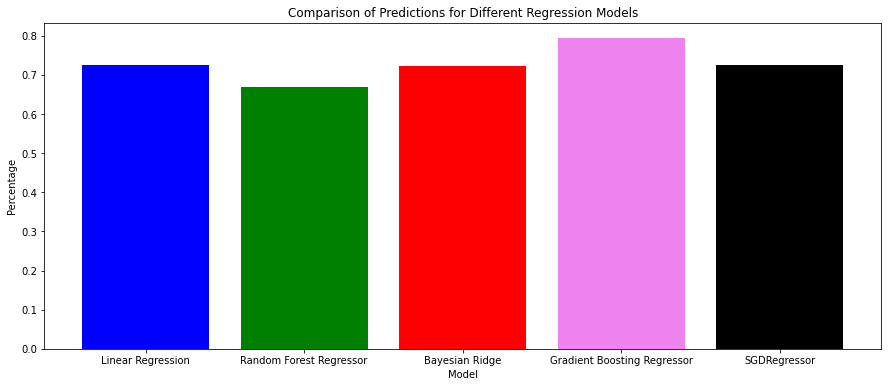

In [44]:
# Train linear regression model
lr_reg = LinearRegression(fit_intercept=True, normalize=False)
lr_reg.fit(x_train, y_train)  # Fitting the dataset into regressor
lr_reg_pred = lr_reg.predict(x_test) # Predicting the values using linear regressor
r2_lr_reg = r2_score(y_test, lr_reg_pred) # Checking the score of each dataset
print("Linear Regression:", r2_lr_reg)
mse = mean_squared_error(y_test, lr_reg_pred)  # mean square error
print("Mean Squared Error:", mse)
print("\n")

# Train random forest regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(x_train, y_train)  # Fitting the dataset into regressor
rf_reg_pred = rf_reg.predict(x_test) # Predicting the values using random forest regressor
r2_rf_reg = r2_score(y_test, rf_reg_pred) # Checking the score of each dataset
print("Random Forest Regressor ", r2_rf_reg )
mse = mean_squared_error(y_test, rf_reg_pred) # mean square error
print("Mean Squared Error:", mse)
print("\n")

# Train Bayesian Ridge regressor
br_reg = BayesianRidge(n_iter=300, tol=0.001, alpha_1=1e-06)  
br_reg.fit(x_train, y_train)  # Fitting the dataset into regressor
br_reg_pred = br_reg.predict(x_test) # Predicting the values using Bayesian Ridge regressor
r2_br_reg = r2_score(y_test, br_reg_pred) # Checking the score of each dataset
print("Bayesian Ridge:", r2_br_reg)
mse = mean_squared_error(y_test, br_reg_pred) # mean square error
print("Mean Squared Error:", mse)
print("\n")

# Train Gradient Boosting Regressor regressor
gbr_reg = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, criterion='friedman_mse')
gbr_reg.fit(x_train, y_train)   # Fitting the dataset into regressor
gbr_reg_pred = gbr_reg.predict(x_test) # Predicting the values using Gradient Boosting regressor
r2_gbr_reg = r2_score(y_test, gbr_reg_pred) # Checking the score of each dataset
print("Gradient Boosting Regressor:", r2_gbr_reg)
mse = mean_squared_error(y_test, gbr_reg_pred) # mean square error
print("Mean Squared Error:", mse)
print("\n")

# Train SGD Regressor
scaler = StandardScaler() # Standardize features by removing the mean and scaling to unit variance
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X_train_scaled, y_train)     # Fitting the dataset into regressor
sgd_reg_pred = sgd_reg.predict(X_test_scaled) # Predicting the values using SGD regressor
r2_sgd_reg = r2_score(y_test, sgd_reg_pred) # Checking the score of each dataset
print("SGD Regressor:", r2_sgd_reg)
mse = mean_squared_error(y_test, sgd_reg_pred) # mean square error
print("Mean Squared Error:", mse) 
print("\n")


val = [r2_lr_reg, r2_rf_reg, r2_br_reg,r2_gbr_reg, r2_sgd_reg ]

# Naming the models
name = ['Linear Regression', 'Random Forest Regressor', 'Bayesian Ridge', 'Gradient Boosting Regressor', 'SGDRegressor']

# Plot the bar chart
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(name, val, color=['blue', 'green', 'red','violet','black'])

ax.set_xlabel('Model')
ax.set_ylabel('Percentage')
ax.set_title('Comparison of Predictions for Different Regression Models')
plt.show()

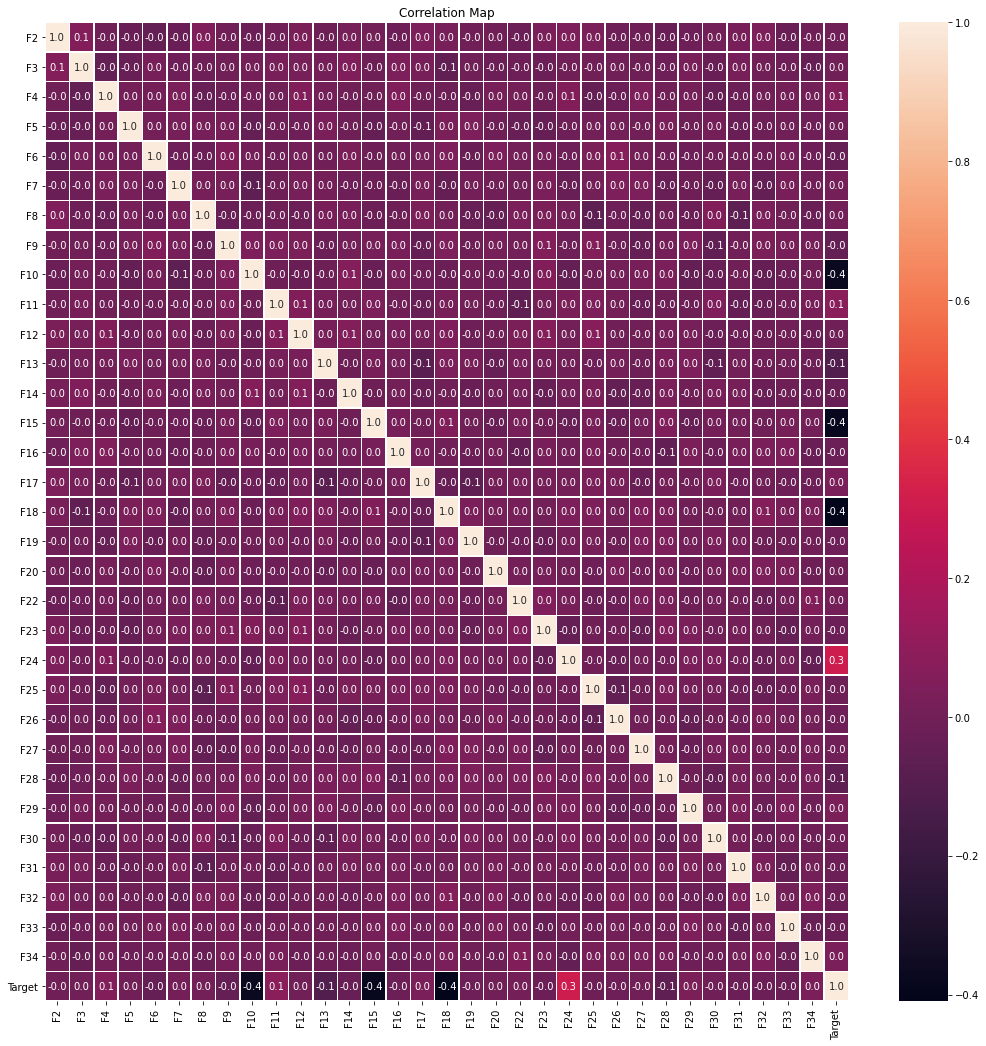

In [45]:
# Correlation Map
data = pd.read_csv('CE802_P3_Data.csv') #dataset
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)  #heatmap
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map') #title
plt.savefig('graph.png') 
plt.show() # Showing the plot

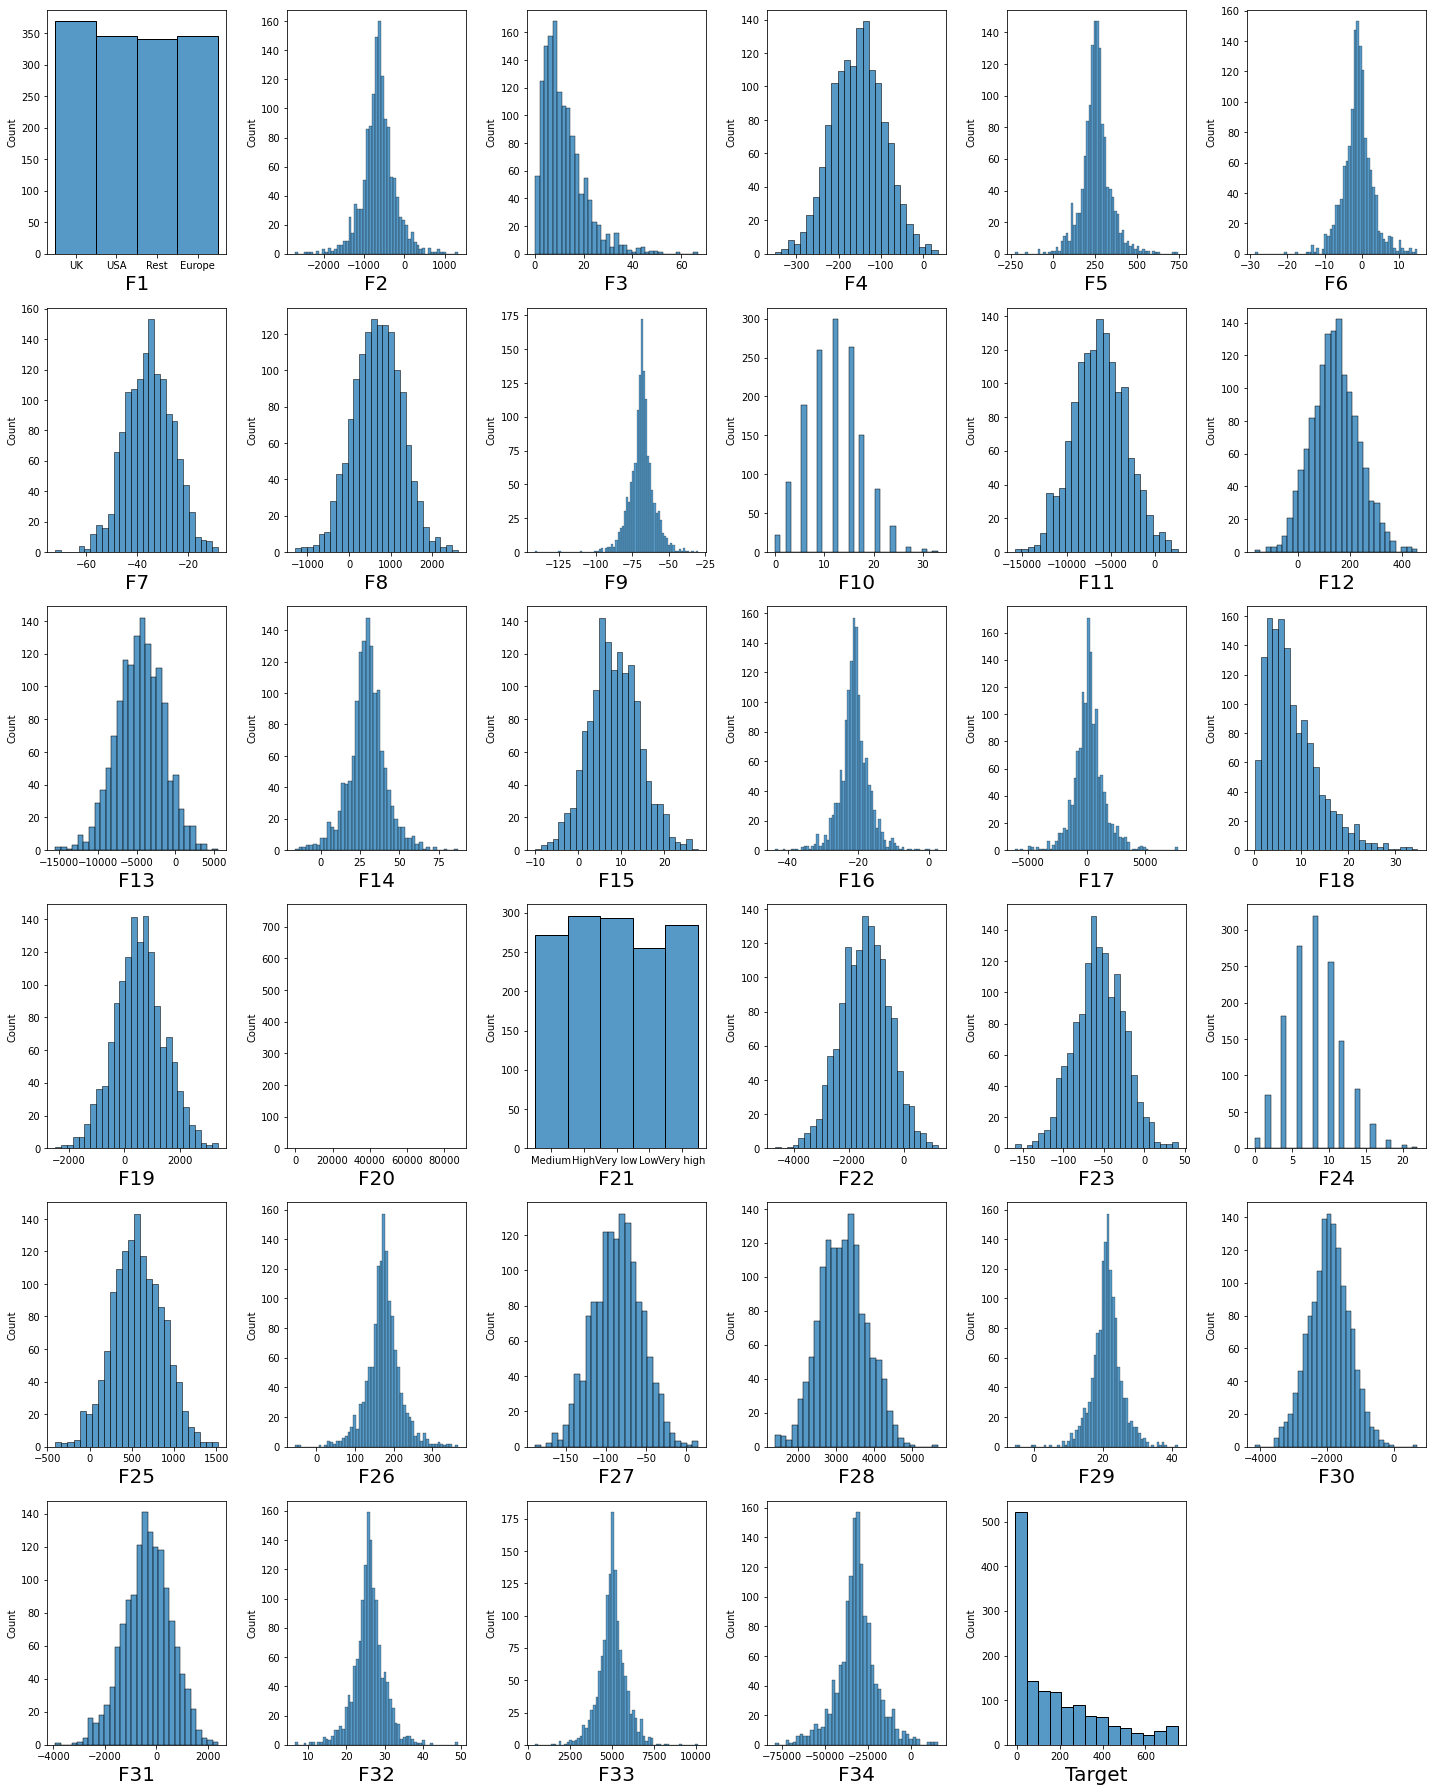

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=36 :
        ax = plt.subplot(6,6,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.savefig('graph2.png')

In [47]:
# Statistical Analysis
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'Target ~ F1+F2+F3+F4+F5+F6+F7+F8+F9+F10+F11+F12+F13+F14+F15+F16+F17+F18+F19', data = data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     100.8
Date:                Tue, 02 May 2023   Prob (F-statistic):          2.21e-260
Time:                        23:07:17   Log-Likelihood:                -8802.5
No. Observations:                1400   AIC:                         1.765e+04
Df Residuals:                    1378   BIC:                         1.776e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    585.2787     43.641     13.411      0.000     499.669     670.888
F1[T.Rest]   -78.9835     10.069     -7.844      0.000     -98.735     -59.232
F1[T.UK]      40.1973      9.888      4.065      0.000      20.801      59.594
F1[T.USA]    132.0078     10.024     13.169      0.000     112.344     151.672
F2            -0.0035      0.009     -0.410      0.682      -0.020       0.013
F3            -0.3763      0.413     -0.911      0.362      -1.186       0.434
F4             0.1587      0.058      2.744      0.006       0.045       0.272
F5            -0.0239      0.039     -0.606      0.544      -0.101       0.053
F6            -0.4961      0.857     -0.579      0.563      -2.177       1.184
F7            -0.6876      0.384     -1.791      0.073      -1.440       0.065
F8             0.0017      0.006      0.275      0.783      -0.010       0.014
F9            -0.2188      0.410     -0.534      0.594      -1.023       0.586
F10          -14.7781      0.646    -22.877      0.000     -16.045     -13.511
F11            0.0073      0.001      6.099      0.000       0.005       0.010
F12            0.0559      0.039      1.416      0.157      -0.022       0.133
F13           -0.0062      0.001     -5.238      0.000      -0.008      -0.004
F14           -0.1982      0.296     -0.669      0.504      -0.780       0.383
F15          -13.9116      0.600    -23.169      0.000     -15.089     -12.734
F16            0.3941      0.818      0.482      0.630      -1.210       1.998
F17            0.0016      0.003      0.574      0.566      -0.004       0.007
F18          -14.7490      0.628    -23.470      0.000     -15.982     -13.516
F19        -5.316e-05      0.004     -0.014      0.989      -0.008       0.008
==============================================================================
Omnibus:                       17.082   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.561
Skew:                           0.273   Prob(JB):                     0.000154
Kurtosis:                       2.956   Cond. No.                     1.04e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Part B

In [48]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P3_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

# Changing categorical to numeric values
x = ['F1',"F21"]
x_c = pd.get_dummies(test_data[x])

test_data = pd.concat([test_data.drop(x, axis=1), x_c],axis=1)

# Predicted using Gradient Boosting Regressor
predicted = gbr_reg.predict(test_data) 

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P3_Test_Predictions.csv').iloc[:,:-1])